<a href="https://colab.research.google.com/github/Nahom32/CV-Lab-Experiments/blob/main/notebooks/Chapter9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ===============================
# 2.1 Face Detection with Haar Cascades
# ===============================
import cv2


face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

img = cv2.imread('/content/drive/MyDrive/man.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

In [4]:
print(faces)

[[ 14  26 109 109]]


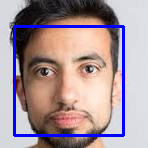

In [7]:
from google.colab.patches import cv2_imshow
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

cv2_imshow( img)
cv2.waitKey(0)
cv2.destroyAllWindows()




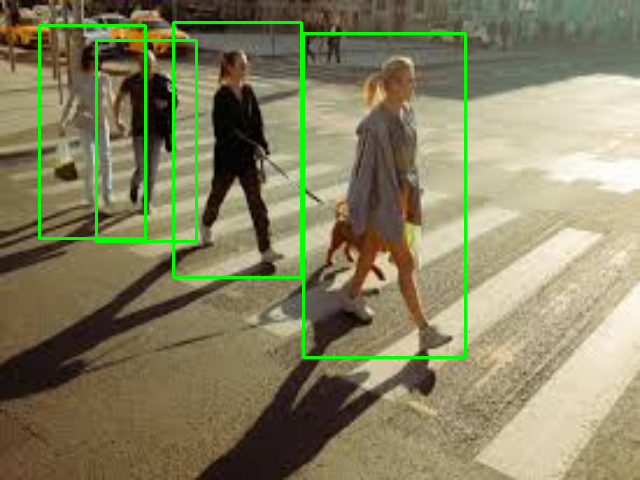

In [9]:
# ===============================
# 3.1 Pedestrian Detection with HOG + SVM
# ===============================
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

img = cv2.imread('/content/drive/MyDrive/pedestrians.jpeg')
img = cv2.resize(img, (640, 480))

(rects, weights) = hog.detectMultiScale(
    img, winStride=(8, 8), padding=(8, 8), scale=1.05
)

for (x, y, w, h) in rects:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()




<IPython.core.display.Javascript object>

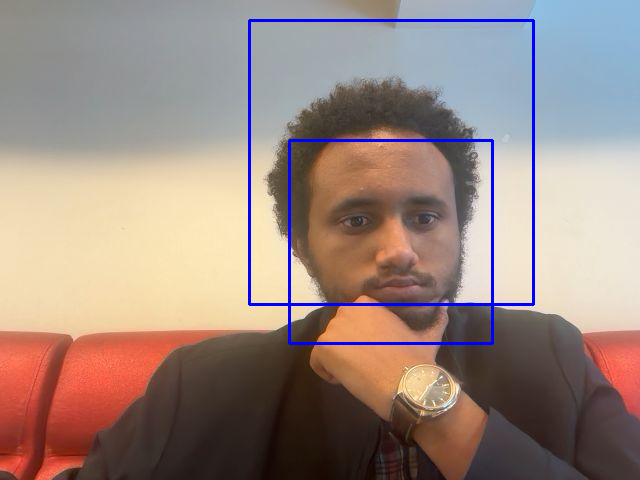

In [13]:
# ===============================
# 4. Real-Time Detection with Webcam
# ===============================
# cap = cv2.VideoCapture(0)

# while True:
#     ret, frame = cap.read()
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.1, 4)

#     for (x, y, w, h) in faces:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

#     cv2.imshow('Real-Time Face Detection', frame)
#     if cv2.waitKey(1) == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()
from IPython.display import Javascript, display
from google.colab.output import eval_js
import cv2
import numpy as np

# Ask for webcam access
from IPython.display import Javascript, display
from google.colab.output import eval_js
import cv2
import numpy as np
import base64

# Inject JavaScript function
def js_to_image(js_reply):
    """Convert JavaScript object to OpenCV image"""
    image_bytes = base64.b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, cv2.IMREAD_COLOR)
    return img

def take_photo(quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture button click
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
      }
      takePhoto({quality})
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    return js_to_image(data)

img = take_photo()


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

from google.colab.patches import cv2_imshow
cv2_imshow(img)



In [ ]:
# Load cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

img = cv2.imread('face_sample.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 5)

for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    smiles = smile_cascade.detectMultiScale(roi_gray, 1.7, 22)

    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (255, 0, 255), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()